In [1]:
#calculo
import numpy as np
import pandas as pd

#grafico
import matplotlib.pyplot as plt
%matplotlib inline

#propios utilitarios
from utils import *

data = pd.read_csv('data/01dataBaseTrainTrxRec.csv', **set_parameter_csv)
data.head()

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
0,2017-01-29 00:00:00,7649,138.0,43629,1,176.0,1,0.014072
1,2016-12-01 00:00:00,24604,75.0,4326,0,81.0,1,0.001667
2,2017-06-01 00:00:00,15289,75.0,4326,0,81.0,1,0.000127
3,2017-09-22 00:00:00,5190,110.0,59776,1,156.0,1,0.001167
4,2017-05-05 00:00:00,16635,75.0,31043,0,81.0,1,0.047386


In [2]:
null_verificator(data)

,Nulos,Cantidad,Tipo Col
fechaOper,False,0,object
codCliente,False,0,int64
codGiro,True,92686,float64
codEstab,False,0,int64
flagLimaProvEstab,False,0,int64
ubigeoEstab,True,92686,float64
ctdTrx,False,0,int64
ratingMonto,False,0,float64


In [3]:
data.describe(include='all')

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
count,1591617,1.591617e+06,1.498931e+06,1.591617e+06,1.591617e+06,1.498931e+06,1.591617e+06,1.591617e+06
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-07-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.334583e+04,1.048248e+02,2.453260e+04,8.084175e-01,1.747467e+02,1.072021e+00,1.318383e-02
std,NaN,8.493548e+03,3.920585e+01,1.990371e+04,3.935464e-01,6.856421e+01,3.465646e-01,3.236438e-02
min,NaN,1.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,2.984905e-06
25%,NaN,6.035000e+03,7.500000e+01,4.339000e+03,1.000000e+00,1.480000e+02,1.000000e+00,1.598366e-03
50%,NaN,1.258100e+04,1.080000e+02,2.266500e+04,1.000000e+00,1.650000e+02,1.000000e+00,4.199563e-03
75%,NaN,2.046200e+04,1.120000e+02,3.673100e+04,1.000000e+00,1.750000e+02,1.000000e+00,1.152572e-02


In [4]:
null_verificator(data)

,Nulos,Cantidad,Tipo Col
fechaOper,False,0,object
codCliente,False,0,int64
codGiro,True,92686,float64
codEstab,False,0,int64
flagLimaProvEstab,False,0,int64
ubigeoEstab,True,92686,float64
ctdTrx,False,0,int64
ratingMonto,False,0,float64


In [5]:
data.fillna(-999, inplace=True)

In [6]:
null_verificator(data)

'DATA LIMPIA DE NULOS'

In [7]:
data.head(10)

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto
0,2017-01-29 00:00:00,7649,138.0,43629,1,176.0,1,0.014072
1,2016-12-01 00:00:00,24604,75.0,4326,0,81.0,1,0.001667
2,2017-06-01 00:00:00,15289,75.0,4326,0,81.0,1,0.000127
3,2017-09-22 00:00:00,5190,110.0,59776,1,156.0,1,0.001167
4,2017-05-05 00:00:00,16635,75.0,31043,0,81.0,1,0.047386
5,2017-08-28 00:00:00,1578,66.0,41706,1,176.0,1,0.019062
6,2017-07-19 00:00:00,18185,85.0,24590,0,22.0,1,0.001747
7,2016-12-01 00:00:00,10836,122.0,230,1,143.0,1,0.008692
8,2017-07-20 00:00:00,11467,110.0,5561,1,148.0,2,0.011116
9,2017-08-24 00:00:00,9763,75.0,826,1,171.0,1,0.032054


In [8]:
data.shape

(1591617, 8)

In [9]:
data['fechaOper'] = data['fechaOper'].apply(lambda x: x.split()[0])
data['fechaOper'][:10]

0    2017-01-29
1    2016-12-01
2    2017-06-01
3    2017-09-22
4    2017-05-05
5    2017-08-28
6    2017-07-19
7    2016-12-01
8    2017-07-20
9    2017-08-24
Name: fechaOper, dtype: object

In [10]:
add_col_dates(data, 'fechaOper', format_match="%Y-%m-%d", year=False)

,fechaOper,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto,date,month,day,month_day,weekday
0,2017-01-29,7649,138.0,43629,1,176.0,1,0.014072,2017-01-29,1,29,129,0
1,2016-12-01,24604,75.0,4326,0,81.0,1,0.001667,2016-12-01,12,1,1201,4
2,2017-06-01,15289,75.0,4326,0,81.0,1,0.000127,2017-06-01,6,1,601,4
3,2017-09-22,5190,110.0,59776,1,156.0,1,0.001167,2017-09-22,9,22,922,5
4,2017-05-05,16635,75.0,31043,0,81.0,1,0.047386,2017-05-05,5,5,505,5
5,2017-08-28,1578,66.0,41706,1,176.0,1,0.019062,2017-08-28,8,28,828,1
6,2017-07-19,18185,85.0,24590,0,22.0,1,0.001747,2017-07-19,7,19,719,3
7,2016-12-01,10836,122.0,230,1,143.0,1,0.008692,2016-12-01,12,1,1201,4
8,2017-07-20,11467,110.0,5561,1,148.0,2,0.011116,2017-07-20,7,20,720,4
9,2017-08-24,9763,75.0,826,1,171.0,1,0.032054,2017-08-24,8,24,824,4


In [11]:
del data['date']
del data['fechaOper']

In [12]:
data.head()

,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto,month,day,month_day,weekday
0,7649,138.0,43629,1,176.0,1,0.014072,1,29,129,0
1,24604,75.0,4326,0,81.0,1,0.001667,12,1,1201,4
2,15289,75.0,4326,0,81.0,1,0.000127,6,1,601,4
3,5190,110.0,59776,1,156.0,1,0.001167,9,22,922,5
4,16635,75.0,31043,0,81.0,1,0.047386,5,5,505,5


In [13]:
data.dtypes

codCliente             int64
codGiro              float64
codEstab               int64
flagLimaProvEstab      int64
ubigeoEstab          float64
ctdTrx                 int64
ratingMonto          float64
month                  int64
day                    int64
month_day              int64
weekday                int64
dtype: object

In [14]:
data['IDD'] = data.index
data.head(10)

,codCliente,codGiro,codEstab,flagLimaProvEstab,ubigeoEstab,ctdTrx,ratingMonto,month,day,month_day,weekday,IDD
0,7649,138.0,43629,1,176.0,1,0.014072,1,29,129,0,0
1,24604,75.0,4326,0,81.0,1,0.001667,12,1,1201,4,1
2,15289,75.0,4326,0,81.0,1,0.000127,6,1,601,4,2
3,5190,110.0,59776,1,156.0,1,0.001167,9,22,922,5,3
4,16635,75.0,31043,0,81.0,1,0.047386,5,5,505,5,4
5,1578,66.0,41706,1,176.0,1,0.019062,8,28,828,1,5
6,18185,85.0,24590,0,22.0,1,0.001747,7,19,719,3,6
7,10836,122.0,230,1,143.0,1,0.008692,12,1,1201,4,7
8,11467,110.0,5561,1,148.0,2,0.011116,7,20,720,4,8
9,9763,75.0,826,1,171.0,1,0.032054,8,24,824,4,9


ctdTrx    0.075877
dtype: float64

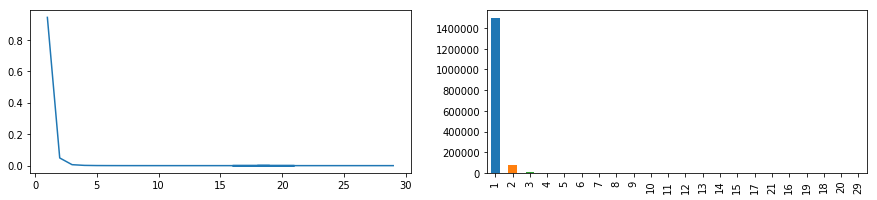

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['ctdTrx'].value_counts(dropna=False, normalize=True).plot(ax=axes[0], figsize=(15,3))
data['ctdTrx'].value_counts(dropna=False).plot.bar(ax=axes[1])

pd.DataFrame(data['ctdTrx']).corrwith(data['ratingMonto'])

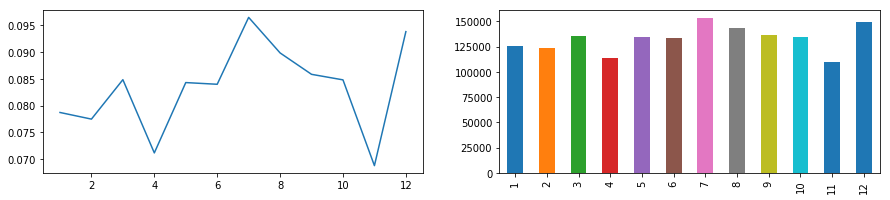

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['month'].value_counts(dropna=False, normalize=True).sort_index().plot(ax=axes[0], figsize=(15,3))
data['month'].value_counts(dropna=False).sort_index().plot.bar(ax=axes[1])

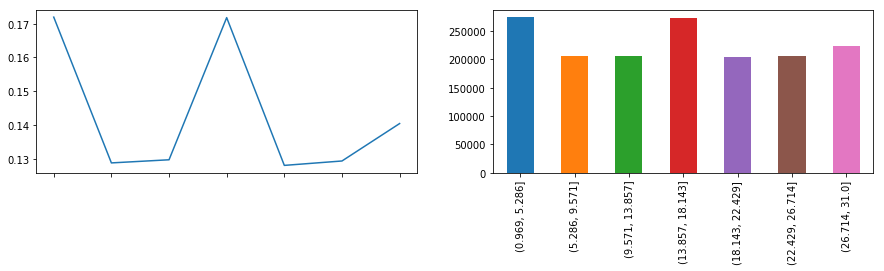

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['day'].value_counts(dropna=False, normalize=True, bins=7).sort_index().plot(ax=axes[0], figsize=(15,3))
data['day'].value_counts(dropna=False, bins=7).sort_index().plot.bar(ax=axes[1])

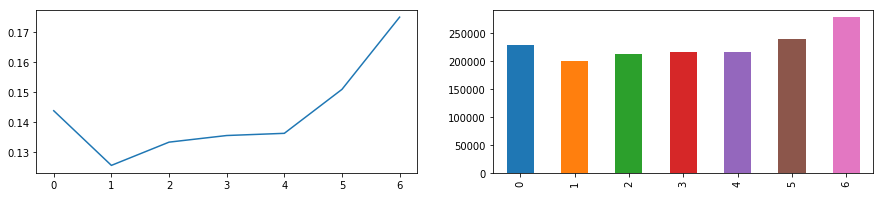

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['weekday'].value_counts(dropna=False, normalize=True).sort_index().plot(ax=axes[0], figsize=(15,3))
data['weekday'].value_counts(dropna=False).sort_index().plot.bar(ax=axes[1])

In [62]:
data['month_day'] = data[['month', 'day']].apply(lambda x: '-'.join(x.astype(str)), axis=1)
data['month_day'][:10]

0    1-29
1    12-1
2     6-1
3    9-22
4     5-5
5    8-28
6    7-19
7    12-1
8    7-20
9    8-24
Name: month_day, dtype: object

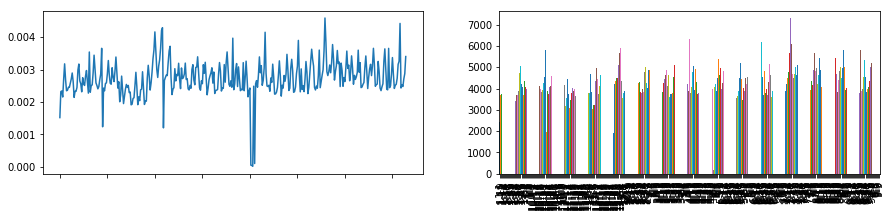

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2)
data['month_day'].value_counts(dropna=False, normalize=True).sort_index().plot(ax=axes[0], figsize=(15,3))
data['month_day'].value_counts(dropna=False).sort_index().plot.bar(ax=axes[1])

In [17]:
data['ctdTrx'].value_counts(dropna=False)

1     1499771
2       77693
3        9724
4        2597
5         888
6         445
7         185
8         114
9          70
10         47
11         26
12         17
13         14
14          7
15          5
17          4
21          3
16          2
19          2
18          1
20          1
29          1
Name: ctdTrx, dtype: int64

In [18]:
from utils import *
data_prueba = reduce_size_data(data, category=False, default='integer')
data_prueba.dtypes

Tamaño de uso actual :  133.57389068603516 MB
-> Int 64 Detected
     codCliente
     codEstab
     flagLimaProvEstab
     ctdTrx
     month
     day
     month_day
     weekday
-> Float 64 Detected
     codGiro
     ubigeoEstab
     ratingMonto
Tamaño de uso final :  37.94718265533447 MB


codCliente             int16
codGiro                int16
codEstab               int32
flagLimaProvEstab       int8
ubigeoEstab            int16
ctdTrx                  int8
ratingMonto          float64
month                   int8
day                     int8
month_day              int16
weekday                 int8
dtype: object

In [25]:
data_prueba.dtypes

codCliente             int64
codGiro              float64
codEstab               int64
flagLimaProvEstab      int64
ubigeoEstab          float64
ctdTrx                 int64
ratingMonto          float64
month                  int64
day                    int64
month_day              int64
weekday                int64
dtype: object

In [16]:
data.to_csv('data/train_clean_parse_date.csv')

In [20]:
for col in data.columns:
    print(col, data[col].unique().shape)

fechaOper (365,)
codCliente (30000,)
codGiro (223,)
codEstab (74339,)
flagLimaProvEstab (2,)
ubigeoEstab (422,)
ctdTrx (22,)
ratingMonto (723645,)
month (12,)
day (31,)
year (2,)
month_day (365,)
weekday (7,)
